## Assignment: Week 3

## To perform Data Visualisation

##  Netflix Dataset - Summary Sheet

##  Objective:
Analyze Netflix content to understand customer preferences based on genre, duration, ratings, regions, and type to support better content recommendations.

---

##  Dataset Overview:
-  Total entries: **7787**
-  Content types: **Movie** & **TV Show**
-  Key features analyzed:
- `Title`, `Director`, `Cast`, `Country`, `Listed_in`, `Duration`, `Rating`

---

##  Data Cleaning & Preparation:
- Replaced nulls with **'Unknown'** (for `director`, `cast`, `country`)
- Cleaned `listed_in` and **exploded genres**
- Split `duration` into **time vs seasons**
- Encoded `rating` into custom **numerical scale**
- Removed irrelevant/unstructured entries (like `"66 min"` in rating)

---

##  Key Insights:
-  Majority of content is from: **United States**
-  Most common genres: **Dramas, International TV, Documentaries**
-  Movie durations mostly range between **90–120 minutes**
-  Very few entries for **children or general audience** (e.g., `TV-Y`, `G`)
-  Content with **TV-MA** rating is most abundant
-  Growing trend in **International & Regional content**

---

##  Visuals Created:

1.  **Dataset Overview** 

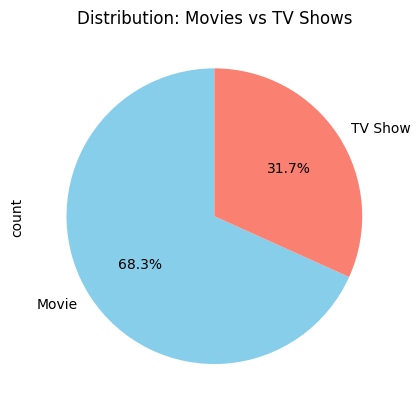

2.  **Content Volume Analysis** 
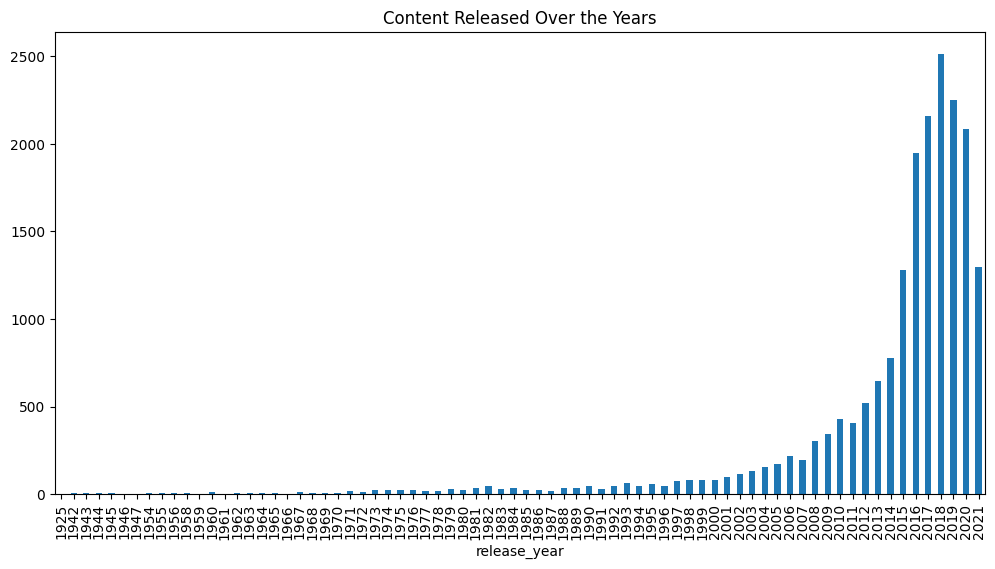

3.  **Most Common Genre on Netflix** 
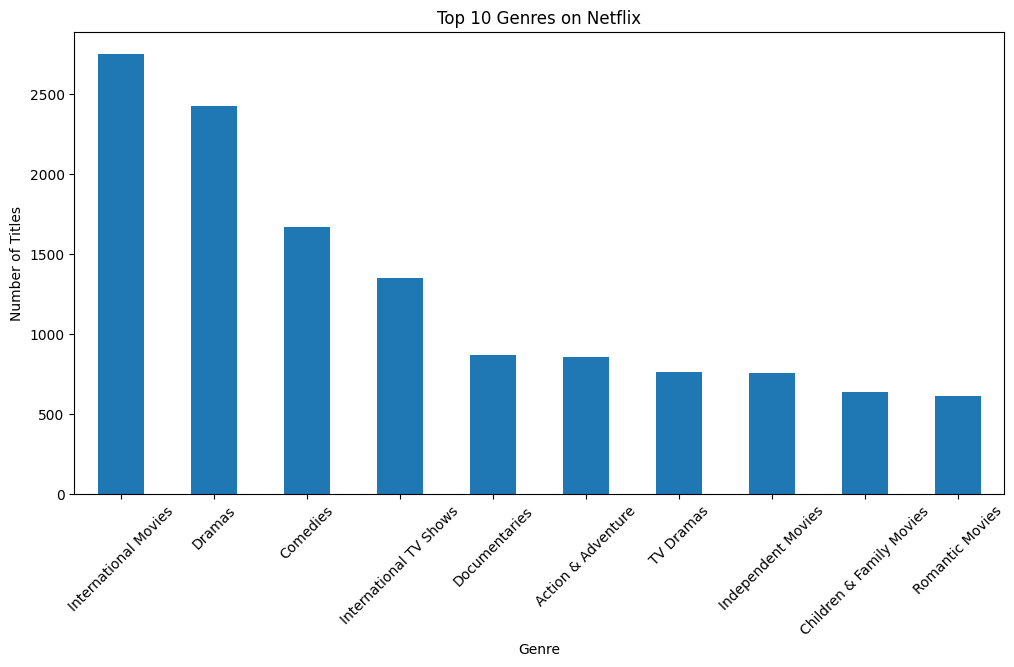

4.  **Top Rated Movies on Netflix**
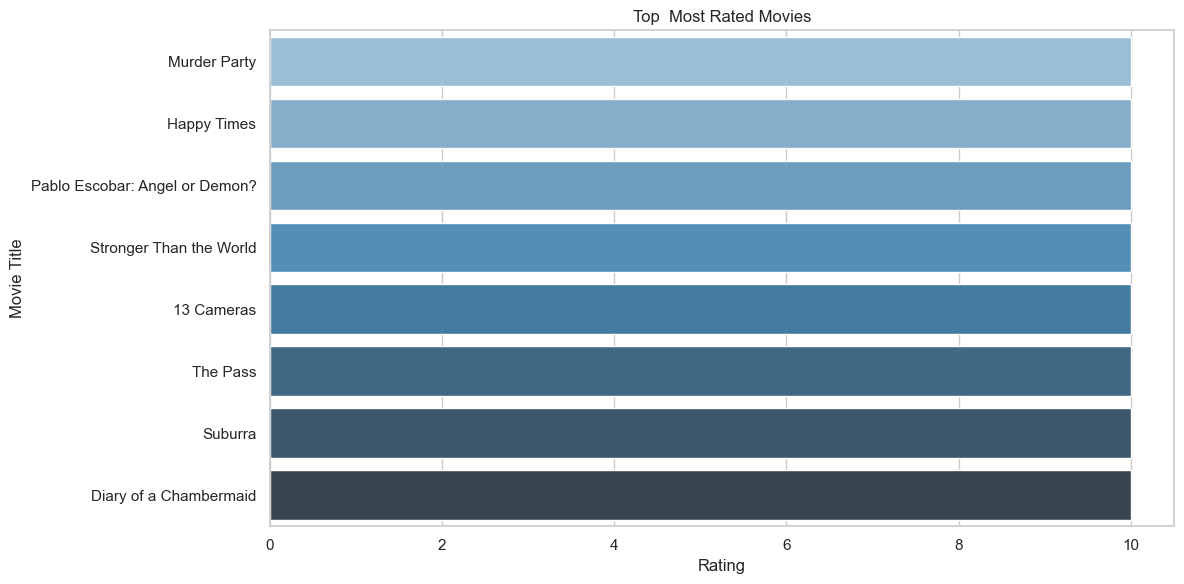

5.  **Top Rated TVShows on Netflix**
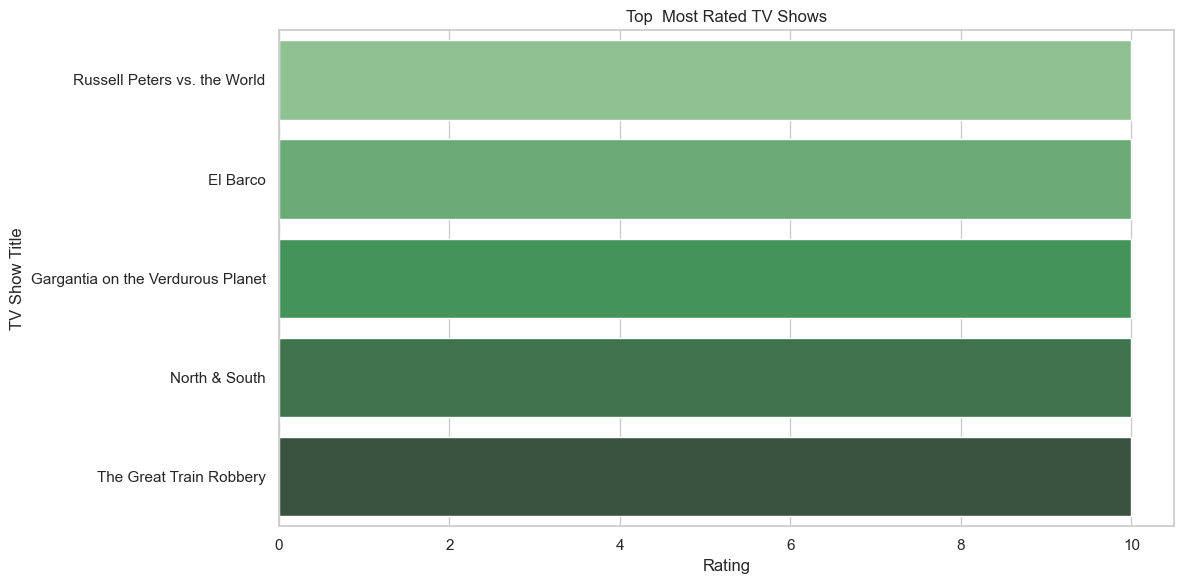

6.   **Top 10 Actors on Netflix**
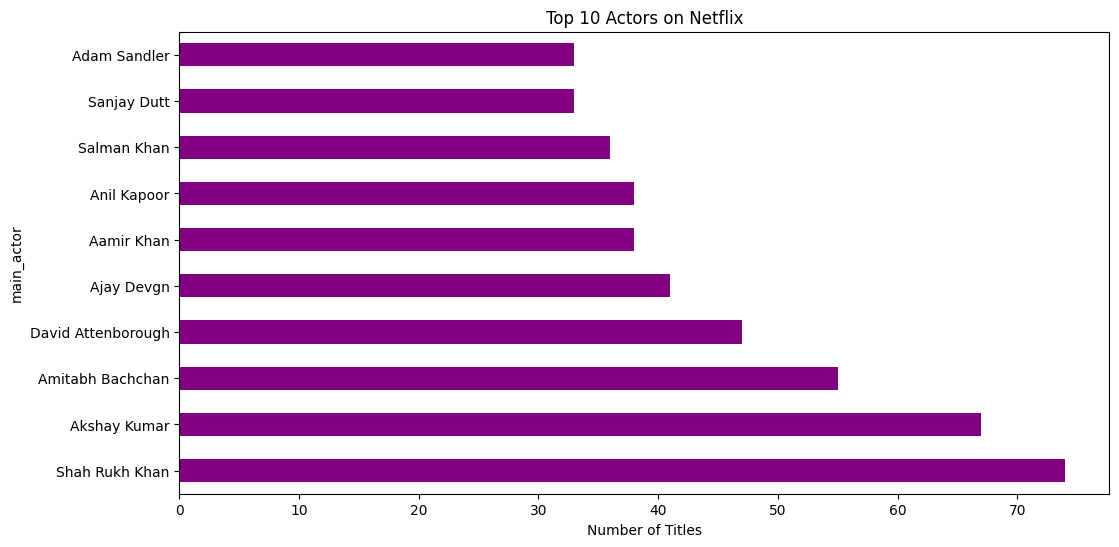

7.  **Top 10 Countries by Production count**
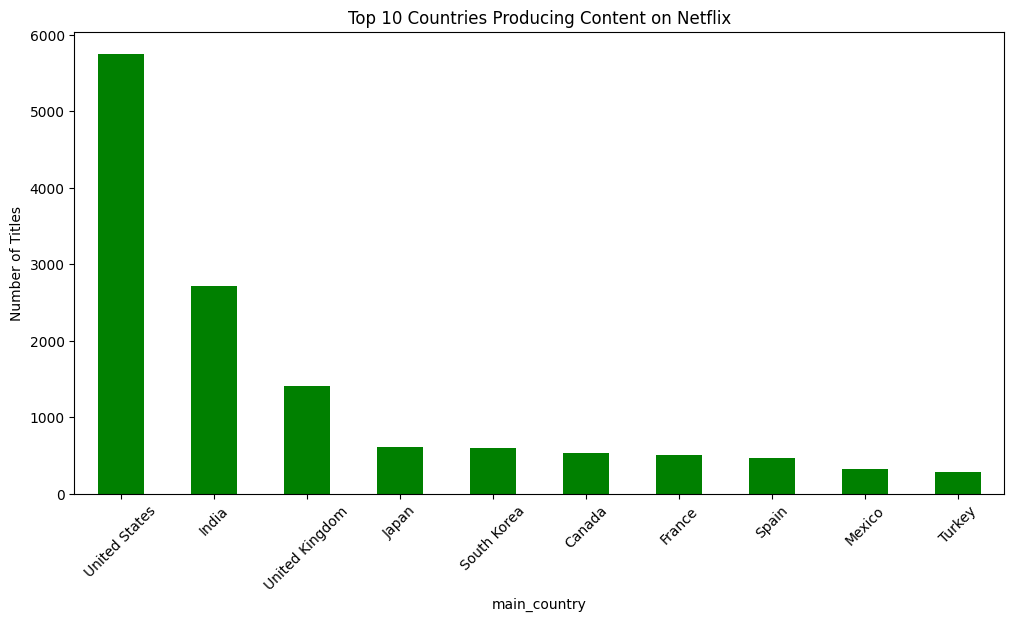

8.  **Word Cloud Visualisation**
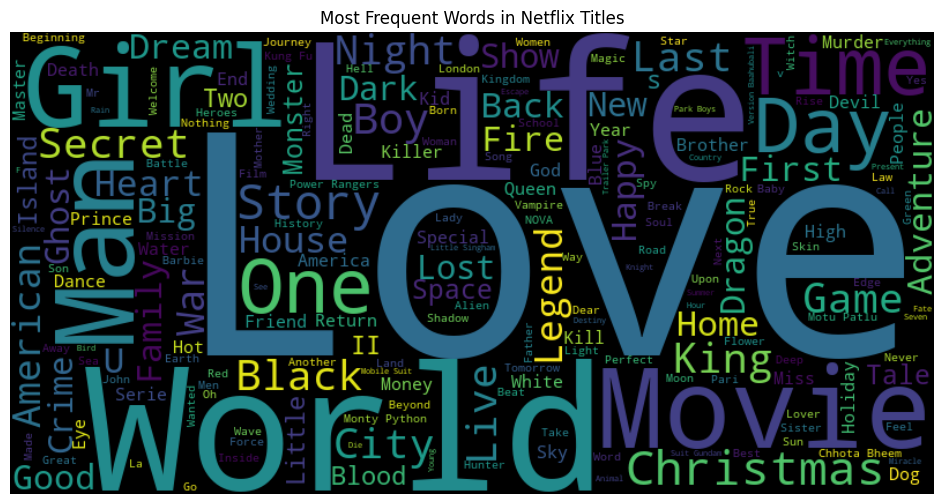


---

##  Recommendations:
-  Focus on **child-friendly** & **general audience** content (TV-G, TV-Y)
-  Invest more in **regional content** for markets like **India, South Korea**
-  Optimize **series length** (many users prefer mini-series)
-  Consider **more diverse genres** based on rising trends
-  Release more content around **festive/seasonal periods**

---

##  Key Questions Answered:
- Which genres are most watched?
- Which countries dominate Netflix content?
- What type of content is missing for children & family audiences?
- How does movie duration influence content?
- Are TV Shows becoming more popular than movies?

---

##  Notes:
- Dataset source: Netflix Kaggle Dataset 
- Visualization tool used: `Matplotlib`, `Seaborn`, `Pandas`
- Project developed for Internship:  **Netflix Movie Recommendation Analysis**



In [48]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [49]:
# Load the dataset

df = pd.read_csv("netflix_dataset.csv")  

# Display the first few rows of the dataset
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [50]:
# Checking for missing values in the dataset

df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [51]:
# Fill missing values

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

In [52]:
# Clean date_added column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')



In [53]:
# Drop unnecessary columns for visualization

df = df.drop(['show_id','date_added', 'description'], axis=1)  # Visualization ke liye unnecessary
 

In [54]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [55]:
# Display the unique values in the 'rating' column to understand its distribution

df['rating'].value_counts(dropna=False)


rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64

In [56]:
# Invalid entries in rating
invalid_ratings = ['66 min', '74 min', '84 min']

# Remove rows with such invalid ratings
df = df[~df['rating'].isin(invalid_ratings)]


In [57]:
# Fill missing values in the 'rating' column with 'Not Rated'

df['rating'] = df['rating'].fillna('Not Rated')


In [58]:
# Map the ratings to numerical values for better analysis

rating_mapping = {
    'TV-Y': 1,
    'TV-G': 2,
    'G': 2,
    'TV-Y7': 3,
    'TV-Y7-FV': 3,
    'PG': 4,
    'TV-PG': 4,
    'PG-13': 5,
    'TV-14': 6,
    'R': 7,
    'TV-MA': 8,
    'NC-17': 9,
    'UR': 9,
    'NR': 10,
    'Not Rated': 10
}

# Remove irrelevant entries like "84 min", "66 min" if not cleaned yet:
df = df[df['rating'].str.contains('min') == False]

# Now map ratings
df['ratings'] = df['rating'].map(rating_mapping).fillna(10).astype(int)


In [59]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,ratings
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,5
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",8
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",8
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV",8
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",8


In [60]:
# Step 1: Drop the 'rating' column
df.drop(columns=['rating'], inplace=True)

# Step 2: Reset the index to start from 1
df.reset_index(drop=True, inplace=True)
df.index += 1  # Now index starts from 1


In [61]:
df.head()

,type,title,director,cast,country,release_year,duration,listed_in,ratings
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,90 min,Documentaries,5
2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",8
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",8
4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,1 Season,"Docuseries, Reality TV",8
5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",8


In [62]:

# Step 3: Clean the 'duration' column to extract type and integer values

def clean_duration(val):
    if pd.isnull(val):
        return pd.Series([None, None])
    val = val.lower().strip()
    
    if 'min' in val:
        duration_type = 'min'
        duration_int = int(val.replace('min', '').strip())
    elif 'season' in val:
        duration_type = 'season'
        duration_int = int(val.replace('seasons', '').replace('season', '').strip())
    else:
        duration_type = None
        duration_int = None
    
    return pd.Series([duration_type, duration_int])

# Apply cleaning function
df[['duration_type', 'duration_int']] = df['duration'].apply(clean_duration)

# Optional: Drop old 'duration' column
df.drop(columns=['duration'], inplace=True)


In [63]:
df.head()

,type,title,director,cast,country,release_year,listed_in,ratings,duration_type,duration_int
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Documentaries,5,min,90
2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries",8,season,2
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,"Crime TV Shows, International TV Shows, TV Act...",8,season,1
4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,"Docuseries, Reality TV",8,season,1
5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",8,season,2


In [64]:
# Cleaning and Expanding the listed_in Column for Genre Analysis

In [65]:
# Step 1: Remove leading/trailing whitespaces
df['listed_in'] = df['listed_in'].str.strip()

# Step 2: Split by comma into a list
df['listed_in'] = df['listed_in'].str.split(',')

# Step 3: Remove extra spaces from each genre in the list
df['listed_in'] = df['listed_in'].apply(lambda x: [i.strip() for i in x])

# Step 4: Explode the list into multiple rows
df_exploded = df.explode('listed_in').reset_index(drop=True)


In [66]:
df.head(10)

,type,title,director,cast,country,release_year,listed_in,ratings,duration_type,duration_int
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,[Documentaries],5,min,90
2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"[International TV Shows, TV Dramas, TV Mysteries]",8,season,2
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,"[Crime TV Shows, International TV Shows, TV Ac...",8,season,1
4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,"[Docuseries, Reality TV]",8,season,1
5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"[International TV Shows, Romantic TV Shows, TV...",8,season,2
6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021,"[TV Dramas, TV Horror, TV Mysteries]",8,season,1
7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021,[Children & Family Movies],4,min,91
8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"[Dramas, Independent Movies, International Mov...",8,min,125
9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,"[British TV Shows, Reality TV]",6,season,9
10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"[Comedies, Dramas]",5,min,104


In [67]:
df_exploded = df.explode('listed_in').reset_index(drop=True)


In [68]:
df.head()

,type,title,director,cast,country,release_year,listed_in,ratings,duration_type,duration_int
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,[Documentaries],5,min,90
2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"[International TV Shows, TV Dramas, TV Mysteries]",8,season,2
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,"[Crime TV Shows, International TV Shows, TV Ac...",8,season,1
4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,"[Docuseries, Reality TV]",8,season,1
5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"[International TV Shows, Romantic TV Shows, TV...",8,season,2


In [69]:
df = df.explode('listed_in').reset_index(drop=True)


In [70]:
df.head()

,type,title,director,cast,country,release_year,listed_in,ratings,duration_type,duration_int
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Documentaries,5,min,90
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,International TV Shows,8,season,2
2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV Dramas,8,season,2
3,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV Mysteries,8,season,2
4,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,Crime TV Shows,8,season,1


In [ ]:
# For simplicity in plots: Use only first country/director/actor if multiple present

df['main_country'] = df['country'].apply(lambda x: x.split(',')[0].strip())
df['main_director'] = df['director'].apply(lambda x: x.split(',')[0].strip())
df['main_actor'] = df['cast'].apply(lambda x: x.split(',')[0].strip())
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())


In [ ]:
## Longest vs Shortest Movies 


movie_duration_df = df[(df['type'] == 'Movie') & (df['duration_type'] == 'min')]

# Longest movie
longest_movie = movie_duration_df.loc[movie_duration_df['duration_int'].idxmax()]

# Shortest movie
shortest_movie = movie_duration_df.loc[movie_duration_df['duration_int'].idxmin()]

print("Longest Movie:", longest_movie['title'], "-", longest_movie['duration_int'], "min")
print("Shortest Movie:", shortest_movie['title'], "-", shortest_movie['duration_int'], "min")


Longest Movie: Black Mirror: Bandersnatch - 312 min
Shortest Movie: Silent - 3 min


## Visualisation

Text(0.5, 1.0, 'Distribution: Movies vs TV Shows')

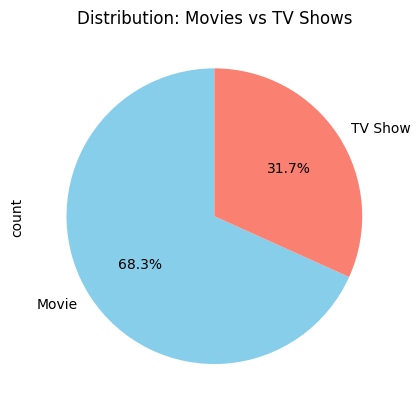

In [73]:
#  1. Dataset Overview

df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title('Distribution: Movies vs TV Shows')


Text(0.5, 1.0, 'Content Released Over the Years')

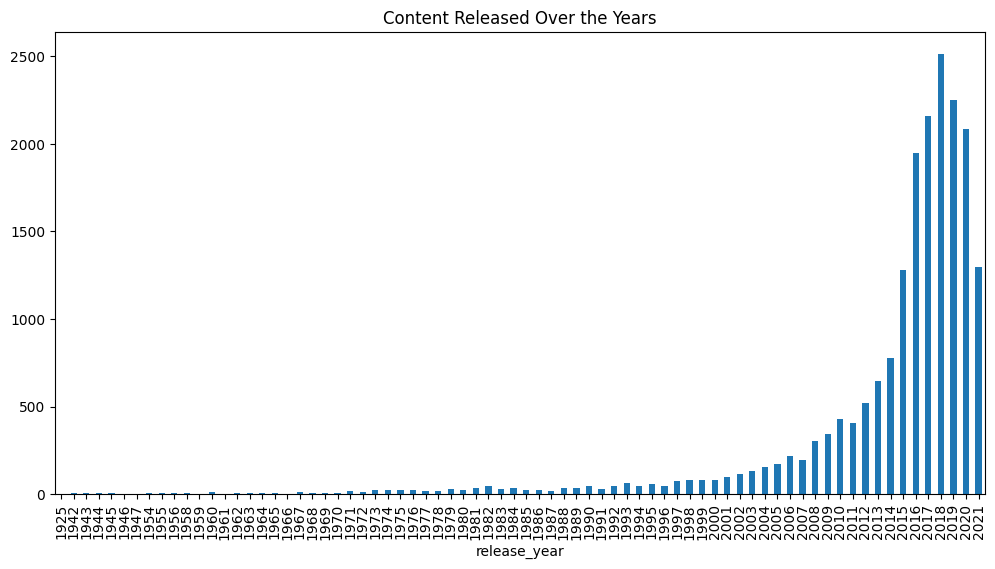

In [74]:
# 2. Content Volume Analysis

df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Content Released Over the Years')


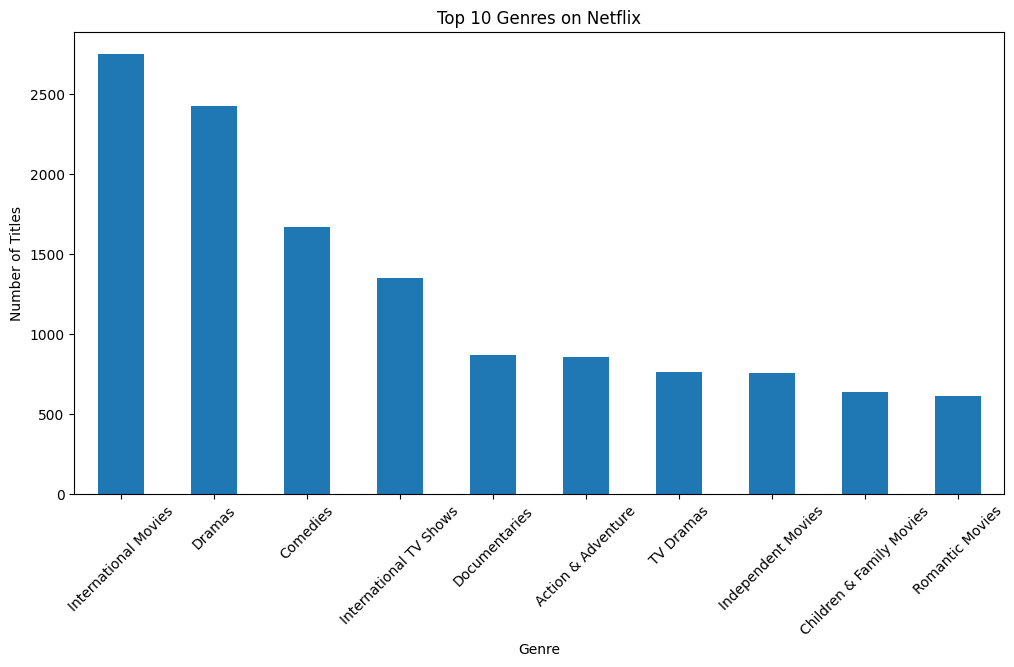

In [ ]:
# 3. visualisation of most rated genre

plt.figure(figsize=(12,6))
df['main_genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


C:\Users\rahul\AppData\Local\Temp\ipykernel_21688\1020215799.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_movies, x='ratings', y='title', palette='Blues_d')


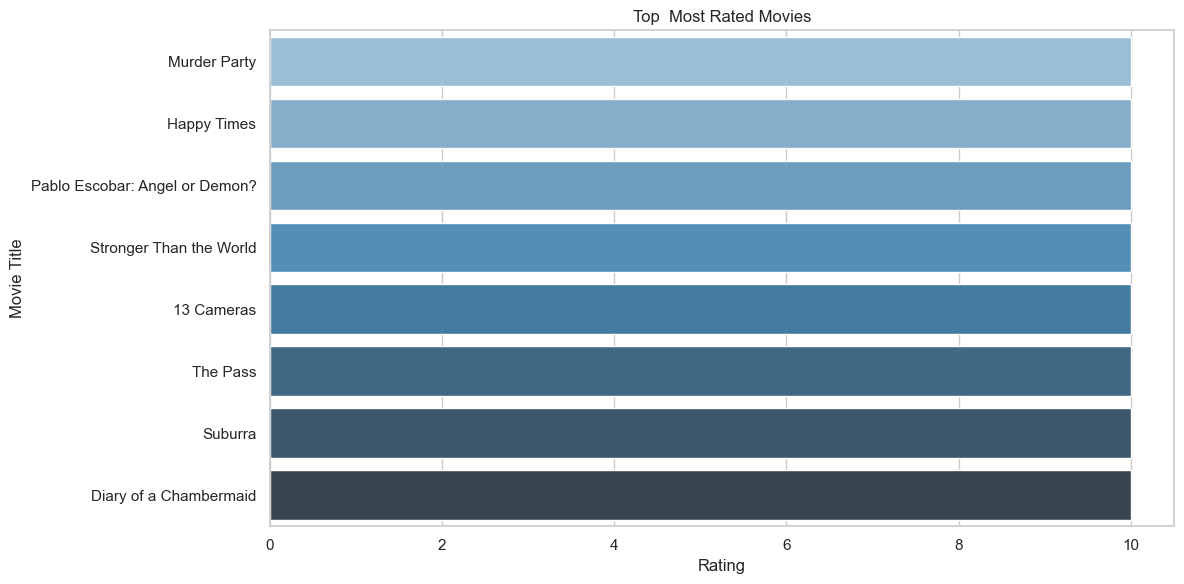

In [ ]:
# 4. Visualization of Top rated movies
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Movies
top_10_movies = df[df['type'] == 'Movie'].sort_values('ratings', ascending=False).dropna(subset=['ratings']).head(10)

# Filter TV Shows
top_10_shows = df[df['type'] == 'TV Show'].sort_values('ratings', ascending=False).dropna(subset=['ratings']).head(10)

# Plot Top 10 Movies
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_movies, x='ratings', y='title', palette='Blues_d')
plt.title('Top  Most Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()




C:\Users\rahul\AppData\Local\Temp\ipykernel_21688\3880440189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_shows, x='ratings', y='title', palette='Greens_d')


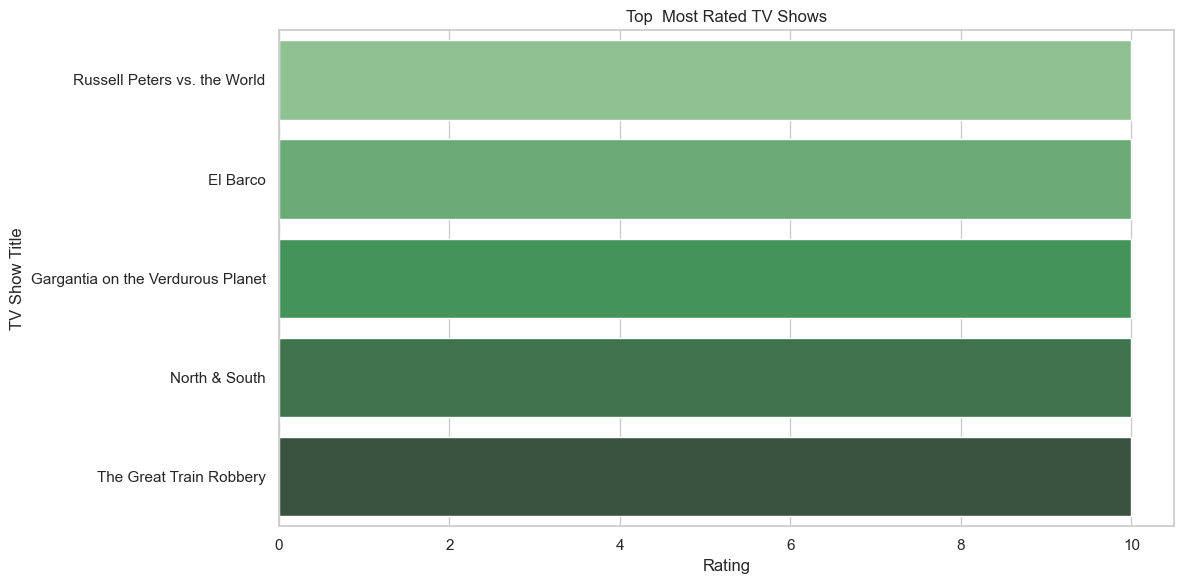

In [ ]:
# 5. Visualization of Top rated TV Shows

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_shows, x='ratings', y='title', palette='Greens_d')
plt.title('Top  Most Rated TV Shows')
plt.xlabel('Rating')
plt.ylabel('TV Show Title')
plt.tight_layout()
plt.show()

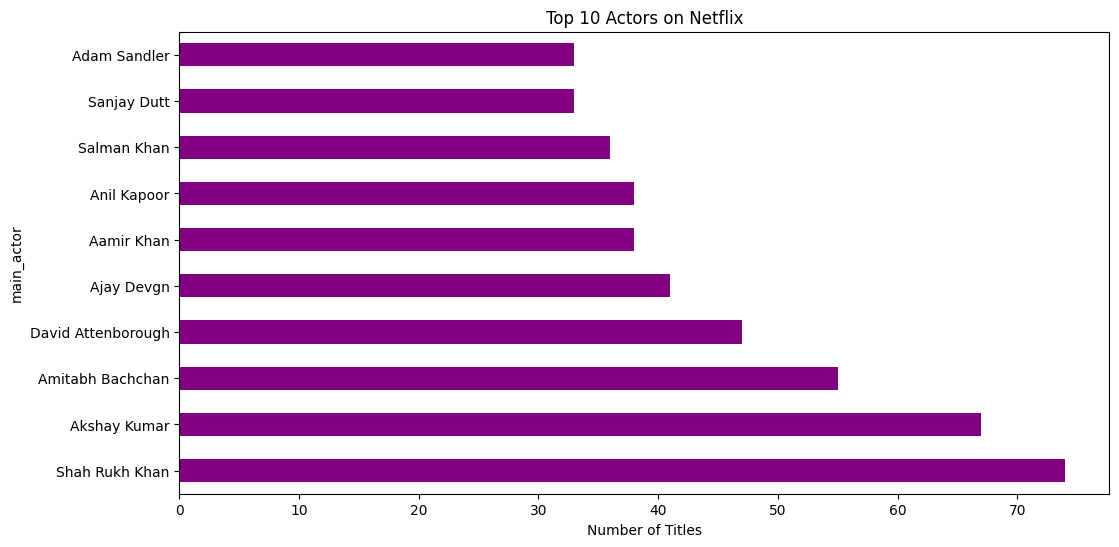

In [ ]:
# 6. Visualisation of top 10 actors (lead cas)

plt.figure(figsize=(12,6))
df['main_actor'].value_counts().drop('Unknown').head(10).plot(kind='barh', color='purple')
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.show()



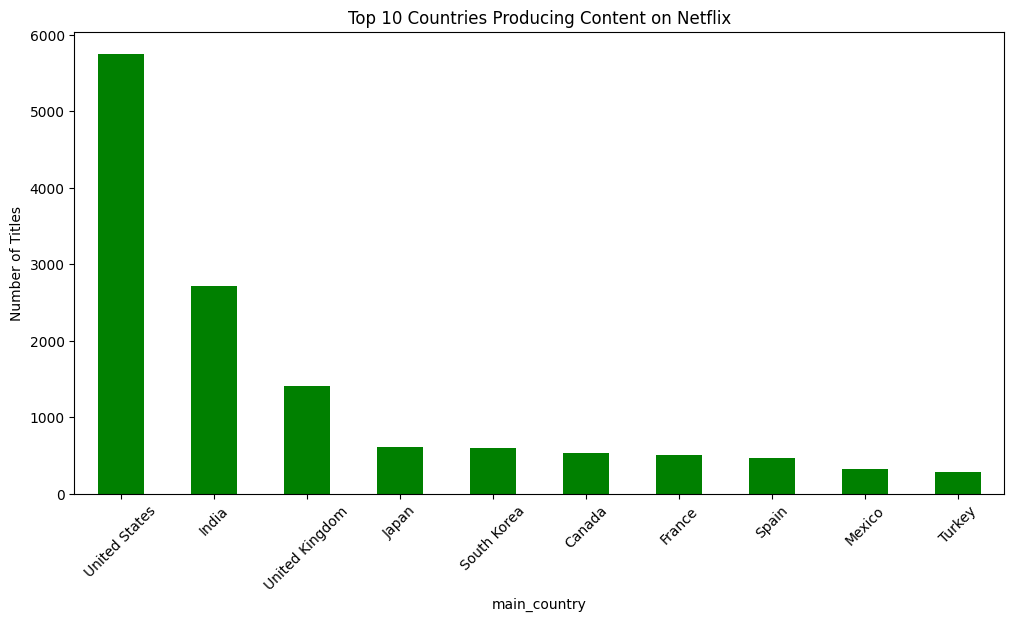

In [ ]:
# 8. Visualisation of top 10 Countries by Production Count

plt.figure(figsize=(12,6))
df['main_country'].value_counts().drop('Unknown').head(10).plot(kind='bar', color='green')
plt.title("Top 10 Countries Producing Content on Netflix")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


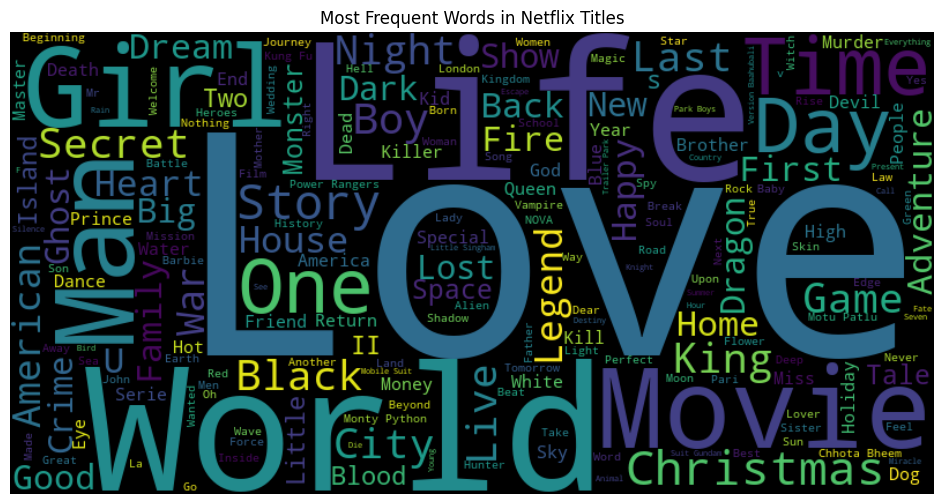

In [ ]:
# 9. Visualization of Word Cloud (from Title or Description)

# Word Cloud of Titles

from wordcloud import WordCloud

title_text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(title_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Netflix Titles")
plt.show()